<a href="https://colab.research.google.com/github/Turusore08/Price-House-Prediction/blob/main/Prediksi_rumah_boskuh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kita import Data dari Kaggle**

In [ ]:
import kagglehub
import os
import pandas as pd


dataset_path = kagglehub.dataset_download("prokshitha/home-value-insights")


files = os.listdir(dataset_path)
print("Files in dataset directory:", files)


csv_file = next((f for f in files if f.endswith('.csv')), None)



df = pd.read_csv(os.path.join(dataset_path, csv_file))
print(df)

Files in dataset directory: ['house_price_regression_dataset.csv']
     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality   Hou

In [ ]:

df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df['House_Age'] = df['Year_Built'].apply(lambda x: 2025-x)

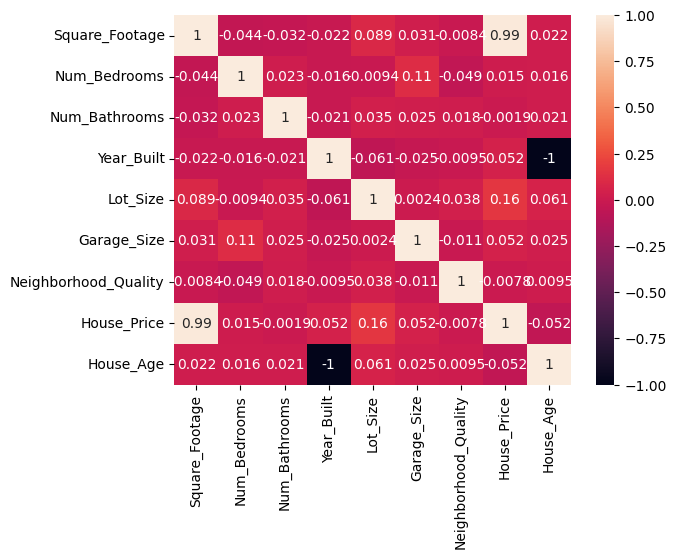

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
x = df.drop(['House_Price','Year_Built'],axis=1)
y = df['House_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

In [ ]:
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(Xtrain_scaled, y_train)

LinearRegression()

In [ ]:
pred = linear_reg.predict(Xtest_scaled)

In [ ]:
mean_absolute_error(y_test, pred)

8174.583600006578

In [ ]:
r2_score(y_test, pred)

0.9984263636823413

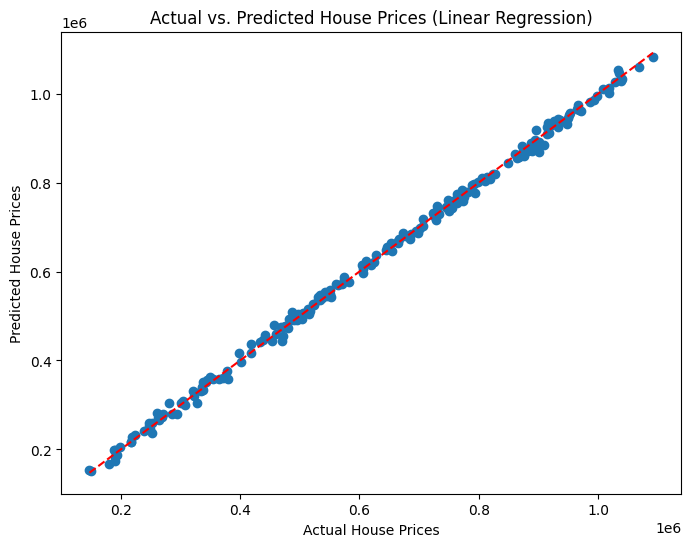

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [ ]:
databaru = pd.DataFrame({
    'Square_Footage' : [3000],
    'Num_Bedrooms' : [4],
    'Num_Bathrooms' : [2],
    'House_Age' : [10],
    'Lot_Size' : [5],
    'Garage_Size' : [1],
    'Neighborhood_Quality' : [4]
})

In [ ]:
predik = linear_reg.predict(databaru)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
print(predik)

[7.50183476e+08]
